<div style="text-align: center;" role="presentation">
<h1 role="presentation"><strong><span role="presentation">Lecci&oacute;n 7 Miércoles 13 de Mayo</span></strong></h1>

# Procesamiento de imágenes con histogramas:

## Histograma:
   
   * Es el gráfico de representacion de distribuciones de frecuencias, en el que se emplean rectángulos dentro de unas coordenadas.
   
   * En nuestro caso, utilizaremos los histogramas para determinar el valor de una intensidad de un pixel en una imagen.
   
   * Cosidere  $A\in\mathbb{R}^{m\times n}$ donde:
   
 $$A = \begin{bmatrix}
 0&  5&  3& 1\\ 
 2&  5&  1& 0\\ 
 0&  2&  4& 1\\ 
 0&  0&  0& 1
\end{bmatrix}$$

   * El histograma para dicha matriz es:
   
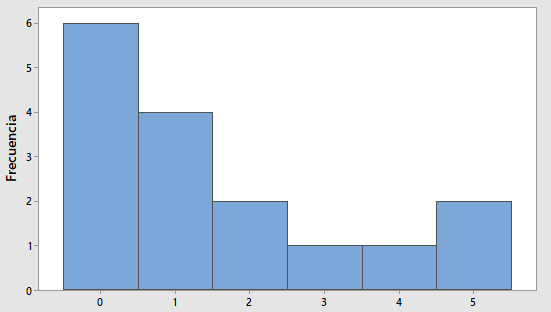
   
   * Es claro que los valores qutoma $A$ estan el conjunto $\left \{ 0,1,2,3,4,5 \right \}$.
   
   * En imagenes a escala de grises $A\in\mathbb{R}^{m\times n}$ donde cada entrada (pixel) toma los valores en el conjunto $\left \{ 0,...,255 \right \}$.
   
   * El histograma es la frecuencia de aparicion de cada nivel de gris en la imagen.
   
   * Cada entrada individual del histograma se expresa de la siguiente manera:
   $$h(k) = n_{k} = card\left \{ (x,y) / f(x,y) = k \right \}$$
   

t1 =  0.93779
t2 =  0.091095
t3 =  0.38598


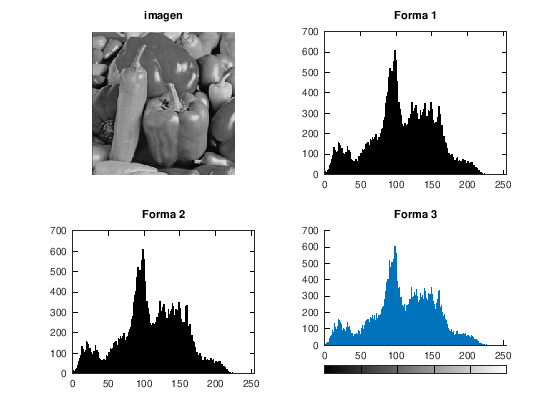

In [11]:
%Ejemplo 1 sobre histogramas%
clc; clear

pkg load image

A=imread('files/peppers.jpg');

subplot(2,2,1)
imshow(A);
title("imagen")

%Forma 1 de calcular el histograma%
h1 = zeros(256,1); [m,n]=size(A);

tic %calcular el tiempo de la forma 1%
for i=1:m
    for j=1:n
        h1(A(i,j)+1) = h1(A(i,j)+1) + 1;
    end
end 
t1 = toc

subplot(2,2,2)
bar(0:255,h1)
xlim([0 255])
title("Forma 1")

%Forma 2 de calcular el histograma%
h2 = zeros(256,1); [m,n]=size(A);

tic
for i=0:255
    h2(i+1) = sum(sum(A==i));
end
t2 = toc


subplot(2,2,3)
bar(0:255,h2)
xlim([0 255])
title("Forma 2")

%Forma 3 de calcular el hsitograma%
tic
subplot(2,2,4)
imhist(A)
title("Forma 3")
t3 = toc

# Técnicas para modificar imagenes con el histograma:

    * Ecualización del histograma: Es una tecnica que cambia la distribucion de nivel de gris de una matriz de tal manera que se obtiene un hist resultante uniforme, en el que el porcentaje de pixeles de cada nivel de grises es el mismo.
    
    * Para esto, necesitamos una funcion auliliar T(r), que satisfase 2 criterios
        1. T(r) es una funcion creciente [0, 255].
        2. 0 <= T(r) <= 1,  para todo r pertenece [0,255].
        
    * Un ejemplo de esta transformacion es la funcion de distribucion acummulada (cdf)
    
    $$
    
    * Ejemplo: sea $h = [1 3 2 4]$. El vector acumulado es $ac = [1 4 5 10]$
    

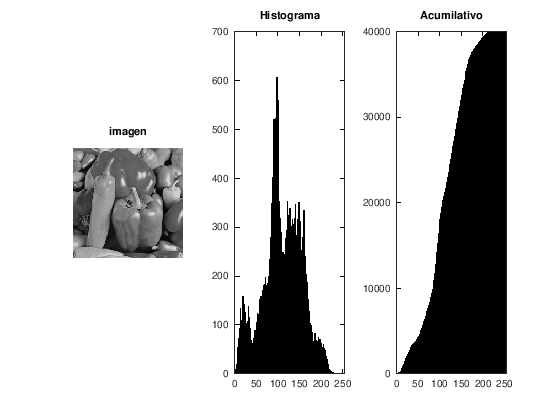

In [14]:
clc; clear;
pkg load image
% Ejemplo 1 de histograma

A = imread('sydney.jpg');

subplot(2, 2, 1);
imshow(A);

[m, n] = size(A);

% Calcular el histograma
h2 = zeros(256, 1);
for i = 0 : 255
  h2(i + 1) = sum(sum(A == i));
endfor

subplot(2, 2, 2);
bar(0:255, h2);
title('Histograma');
xlim([0 255]);

% Distribucion acumulada
ac = zeros(256, 1);
for i = 0 : 255
  ac(i + 1) = sum(h2(1 : i + 1)) / (m * n);
endfor

% Obtener la nueva imagen aplicando la tecnica de ecualizacion
B = zeros(m, n);
B = uint8(B);

for i = 1 : m
  for j = 1 : n
    B(i, j) = round(ac(A(i, j) + 1) * 255); 
  endfor
endfor

subplot(2, 2, 3);
imshow(B);

% Calcular el histograma
h3 = zeros(256, 1);
for i = 0 : 255
  h3(i + 1) = sum(sum(B == i));
endfor

subplot(2, 2, 4);
bar(0:255, h3);
title('Histograma');
xlim([0 255]);


 * Metodo:  Sea $\left \{ 0,1,2,3,4,5 \right \}$, con valores en sus entradas iguales a $0,1,...,255$. Cambiaremos el valor de la posicion $A_{i,j}$ por el valor $S_{k}*255$ es decir, la transformada consiste en la siguiente formula: 
    $A_{i,j} = \left \lfloor S_{k} * 255 \right \rfloor$, donde $A_{i,j} = k$

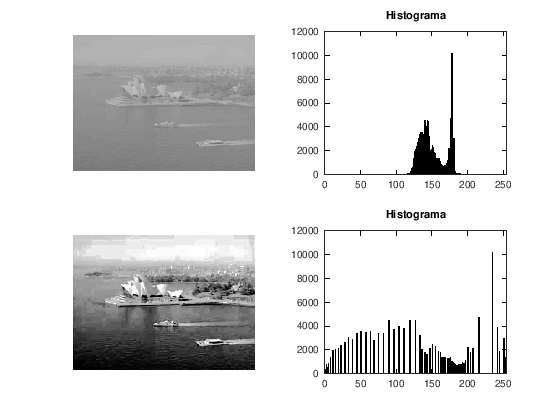

In [2]:
clc; clear;
pkg load image
% Ejemplo 1 de histograma

A = imread('files/sydney.jpg');

subplot(2, 2, 1);
imshow(A);

[m, n] = size(A);

% Calcular el histograma
h2 = zeros(256, 1);
for i = 0 : 255
  h2(i + 1) = sum(sum(A == i));
endfor

subplot(2, 2, 2);
bar(0:255, h2);
title('Histograma');
xlim([0 255]);

% Distribucion acumulada
ac = zeros(256, 1);
for i = 0 : 255
  ac(i + 1) = sum(h2(1 : i + 1)) / (m * n);
endfor

% Obtener la nueva imagen aplicando la tecnica de ecualizacion
B = zeros(m, n);
B = uint8(B);

for i = 1 : m
  for j = 1 : n
    B(i, j) = round(ac(A(i, j) + 1) * 255); 
  endfor
endfor

subplot(2, 2, 3);
imshow(B);

% Calcular el histograma
h3 = zeros(256, 1);
for i = 0 : 255
  h3(i + 1) = sum(sum(B == i));
endfor

subplot(2, 2, 4);
bar(0:255, h3);
title('Histograma');
xlim([0 255]);